In [58]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d
from scipy.signal import find_peaks
from scipy.interpolate import interp1d

In [59]:
m = 100
r = 0.2
A = np.pi * r**2  # cross-sectional area
Cd = 0.47  # the dimensionless air-drag coefficient
g = 9.8  # the gravitational accelation on the surface of Earth (in m/s**2)
rhoa = 1.  # the air density (in kg/m**3)
c2 = 0.5*Cd*rhoa*A

In [60]:
# the function defining the right-hand sides of the ODEs
def dy_dt(y, t, a, b, vw):
    y1, y2, y3, y4 = y
    dydt = [y2, b*(y2+vw)*np.sqrt((y2+vw)**2+y4**2), y4, a+b*y4*np.sqrt((y2+vw)**2+y4**2)]
    return dydt

def intercept(x, y, i=0):
    # x: independent variable, i.e. time. Value returned corresponds to the intercept along this axis
    # x: dependent variable to find the intercept
    # i: intercept value
    return round(x[np.argwhere(x<=i)[0][0]])

In [61]:
t_start = 0
t_end = 120
n = 10000
t = np.linspace(t_start, t_end, n)

a = -g
b = -c2/m
wind = 26.8224  # speed, converted to m/s

Required ground speed is 203.567mph to hit the target.
The trailing side is linear due to the bomb hitting terminal velocity. The wind is completely horizontal so only drag causes the bomb to slow down its vertical velocity


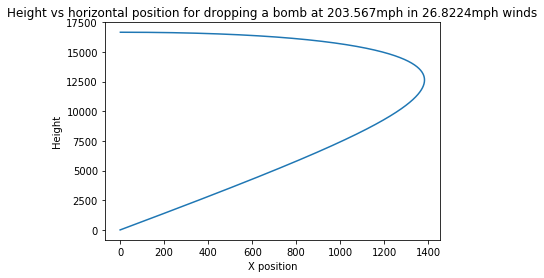

In [83]:
speed = 0
while True:
    y0 = [0, speed, 50000/3, 0]  # x, Vx, y, Vy initial conditions
    x, vx, y, vy  = odeint(dy_dt, y0, t, args=(a, b, wind)).T
    fx = interp1d(y, x)
    hit = fx(0)
    if hit >= 0:
        print(f"Required ground speed is {speed*2.237}mph to hit the target.")
        plt.plot(x[x>0], y[x>0])
        plt.title(f"Height vs horizontal position for dropping a bomb at {speed*2.237}mph in {wind}mph winds")
        plt.xlabel("X position")
        plt.ylabel("Height")
        break
    
    speed += 1
print("The trailing side is linear due to the bomb hitting terminal velocity. \
The wind is completely horizontal so only drag causes the bomb to slow down its vertical \
velocity")

In [98]:
speed = 0
r = []
while True:
    y0 = [0, speed, 50000/3, 0]  # x, Vx, y, Vy initial conditions
    x, vx, y, vy  = odeint(dy_dt, y0, t, args=(a, b, wind)).T
    fx = interp1d(y, x)
    hit = fx(0)
    if hit >= -100 and len(r) == 0:
        r.append(speed)
        print("hit")
    if hit >= 100 and len(r) == 1:
        r.append(speed)
        print(f"The planes speed must be within {(r[1]-r[0])*2.237}mph to hit within 100m")
        break
    speed += 1

hit
The planes speed must be within 24.607mph to hit within 100m
